# DataSpark: Illuminating Insights for Global Electronics

## Skills
Data cleaning and processing | EDA | Python | Data management using SQL | Power BI | Tableau

### Importing all the required packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

## Data cleaning process for given data

### Customers csv file and data cleaning

In [9]:
# import data from csv

df_cus = pd.read_csv("csv_data/DataSet/Customers.csv", encoding='ISO-8859-1')
df_cus.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [10]:
df_cus.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [11]:
# datetime format adjustment for 'Birthday' column as YYYY/MM/DD

df_cus['Birthday'] = df_cus['Birthday'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
df_cus.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939/07/03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979/09/27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947/05/26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957/09/17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965/11/19


In [12]:
# filter out missing values
df_cus = df_cus.dropna()
df_cus

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939/07/03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979/09/27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947/05/26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957/09/17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965/11/19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936/03/25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992/02/16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937/11/09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937/10/12


In [13]:
df_cus.isnull().sum() # check for missing values

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

Text(0.5, 1.0, 'Counts as per Country')

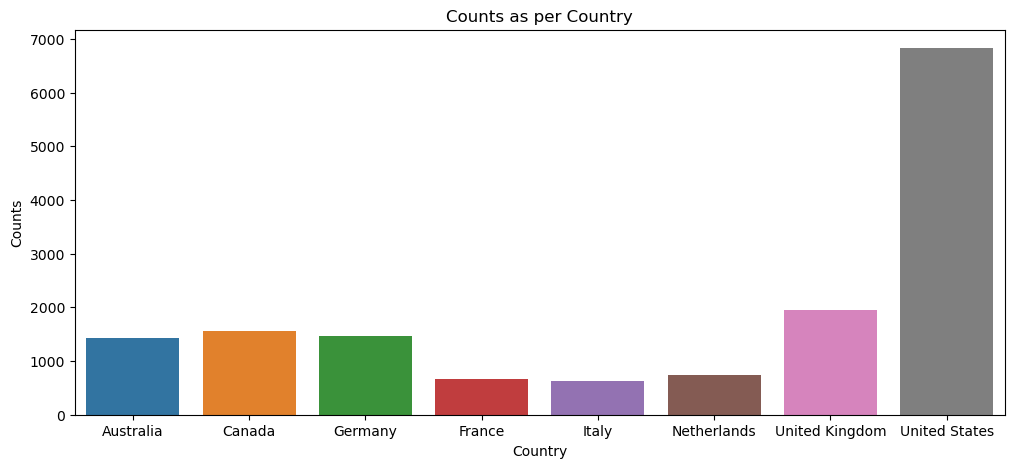

In [14]:
# country count visualization
plt.figure(figsize=(12,5))
sns.countplot(x=df_cus["Country"], data=df_cus, hue ='Country')
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")

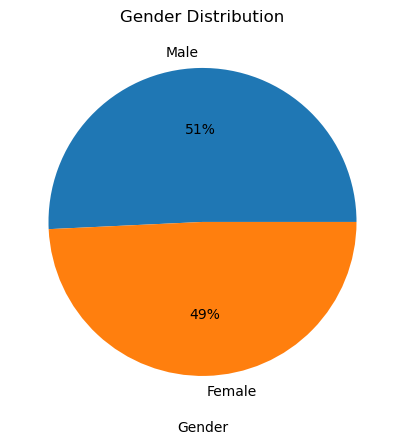

In [15]:
# gender distribution visualization
plt.figure(figsize=(12,5))
plt.pie(df_cus["Gender"].value_counts(),autopct='%1.0f%%',labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.show()

###  Exchange_Rate csv file and data cleaning

In [16]:
df_exchange = pd.read_csv("csv_data/DataSet/Exchange_Rates.csv", encoding='ISO-8859-1')
df_exchange.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [17]:
df_exchange.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [18]:
df_exchange.isnull().sum() # check for missing values

Date        0
Currency    0
Exchange    0
dtype: int64

In [19]:
df_exchange.rename(columns={'Currency':'Currency_Code'}, inplace=True) # rename column
df_exchange.head()

,Date,Currency_Code,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [20]:
df_exchange['Date'] = df_exchange['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d')) # datetime format adjustment for 'Date' column as YYYY/MM/DD
df_exchange.head()

,Date,Currency_Code,Exchange
0,2015/01/01,USD,1.0000
1,2015/01/01,CAD,1.1583
2,2015/01/01,AUD,1.2214
3,2015/01/01,EUR,0.8237
4,2015/01/01,GBP,0.6415


In [21]:
er_labels = df_exchange['Currency_Code'].value_counts().index
er_labels

Index(['USD', 'CAD', 'AUD', 'EUR', 'GBP'], dtype='object', name='Currency_Code')

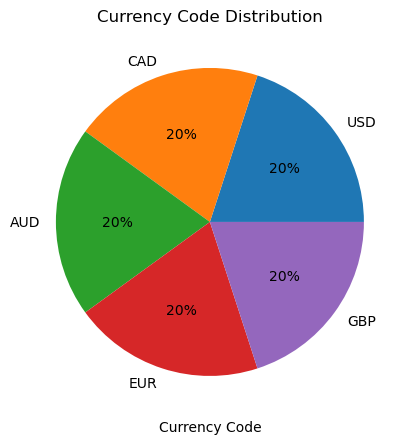

In [22]:
plt.figure(figsize=(12,5))
plt.pie(df_exchange['Currency_Code'].value_counts(),autopct='%1.0f%%',labels=er_labels)
plt.xlabel('Currency Code')
plt.title('Currency Code Distribution')
plt.show()

### product csv file and data cleaning

In [23]:
df_product = pd.read_csv("csv_data/DataSet/Products.csv", encoding='ISO-8859-1')
df_product.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [24]:
df_product.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [25]:
df_product.isnull().sum() # check for missing values

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [26]:
df_product["Unit Cost USD"] = df_product["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
df_product["Unit Cost USD"] = df_product["Unit Cost USD"].astype(float)

df_product["Unit Price USD"] = df_product["Unit Price USD"].str.replace("$", "").str.replace(",", "")
df_product["Unit Price USD"] = df_product["Unit Price USD"].astype(float)

In [27]:
df_product.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [28]:
product_labels = df_product['Brand'].value_counts().index
product_labels

Index(['Contoso', 'Fabrikam', 'Litware', 'Proseware', 'Adventure Works',
       'Southridge Video', 'Wide World Importers', 'The Phone Company',
       'Tailspin Toys', 'A. Datum', 'Northwind Traders'],
      dtype='object', name='Brand')

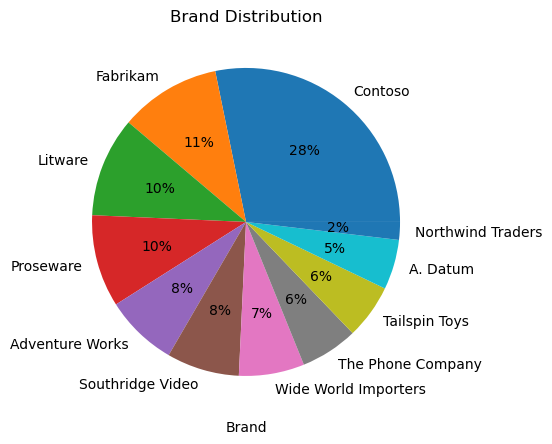

In [29]:
plt.figure(figsize=(12,5))
plt.pie(df_product['Brand'].value_counts(),autopct='%1.0f%%',labels=product_labels)
plt.xlabel('Brand')
plt.title('Brand Distribution')
plt.show()

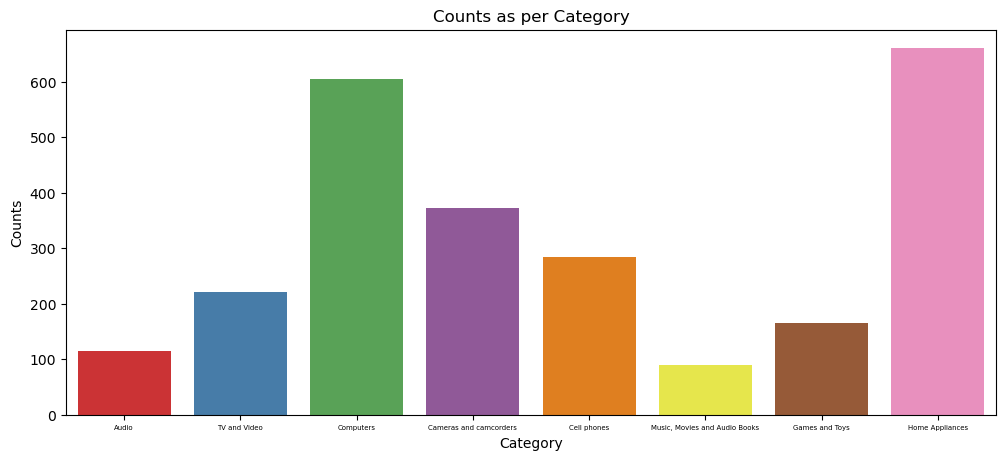

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x=df_product["Category"], data=df_product, hue ='Category', palette='Set1')
plt.xlabel("Category")
plt.ylabel("Counts")
plt.xticks(rotation=0, size=5)
plt.title("Counts as per Category")
plt.show()


### sales data csv file and data cleaning

In [31]:
df_sales = pd.read_csv("csv_data/DataSet/Sales.csv", encoding='ISO-8859-1')
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [32]:
# sales data type check
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [33]:
df_sales.isnull().sum() # check for missing values

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [34]:
# datetime format adjustment for 'Date' column as YYYY/MM/DD
df_sales['Order Date'] = df_sales['Order Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016/01/01,NaN,265598,10,1304,1,CAD
1,366001,1,2016/01/01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016/01/01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016/01/01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016/01/01,1/12/2016,266019,0,373,1,CAD


In [35]:
# fill the missing values
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016/01/01,0,265598,10,1304,1,CAD
1,366001,1,2016/01/01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016/01/01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016/01/01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016/01/01,1/12/2016,266019,0,373,1,CAD


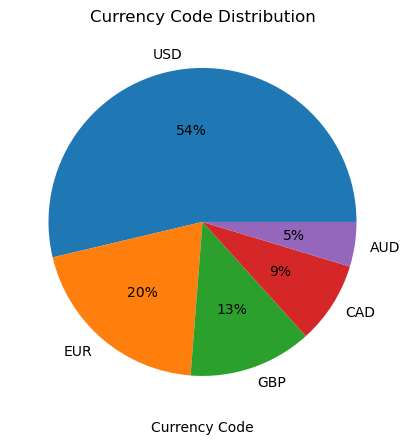

In [36]:
plt.figure(figsize=(12,5))
plt.pie(df_sales['Currency Code'].value_counts(),autopct='%1.0f%%',labels=df_sales['Currency Code'].value_counts().index)
plt.xlabel('Currency Code')
plt.title('Currency Code Distribution')
plt.show()

### stores csv file and data cleaning

In [37]:
df_store = pd.read_csv("csv_data/DataSet/Stores.csv", encoding='ISO-8859-1')
df_store.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [38]:
df_store.info() # check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [39]:
df_store.isnull().sum() # check for missing values

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [40]:
df_store['Square Meters'] = df_store['Square Meters'].fillna(0)
df_store.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [41]:
df_store['Open Date'] = df_store['Open Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d')) # datetime format adjustment for 'Open Date' column as YYYY/MM/DD
df_store.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008/01/01
1,2,Australia,Northern Territory,665.0,2008/01/12
2,3,Australia,South Australia,2000.0,2012/01/07
3,4,Australia,Tasmania,2000.0,2010/01/01
4,5,Australia,Victoria,2000.0,2015/12/09


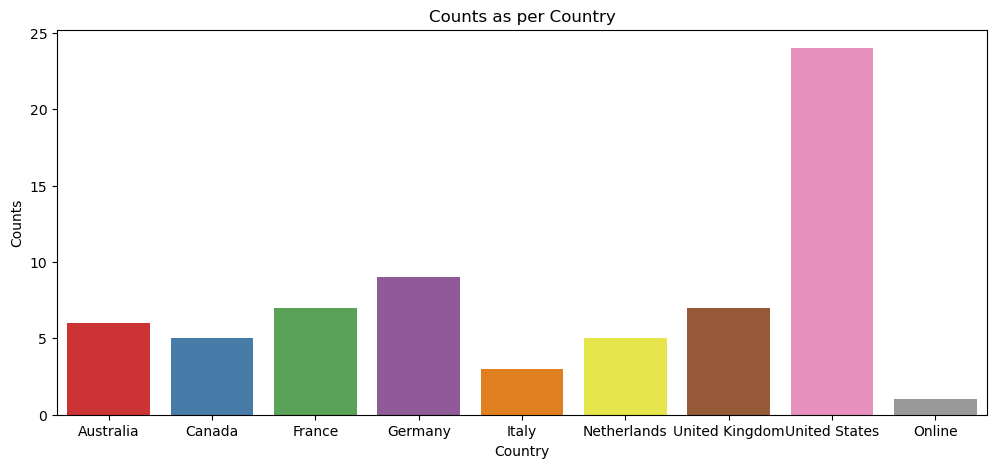

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(x=df_store["Country"], data=df_store, hue ='Country', palette='Set1')
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")
plt.show()

### Create SQL database

In [ ]:
#sql connection
sql = mysql.connector.connect(host="localhost", user="root", password="")
my_cursor = sql.cursor()
my_cursor.execute("CREATE DATABASE IF NOT EXISTS customer_sale_data")
print("Database created successfully")
sql.database = "customer_sale_data"

Database created successfully


In [44]:
#create table for customer details
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_details(
                  customerkey INT,
                  gender VARCHAR(255),
                  name VARCHAR(255),
                  city VARCHAR(255),
                  state VARCHAR(255),
                  country VARCHAR(255),
                  continent VARCHAR(255),
                  birthday VARCHAR(255)
                  )''')
print("Table created successfully")

Table created successfully


In [45]:
df_cus = df_cus[['CustomerKey', 'Gender', 'Name', 'City', 'State', 'Country', 'Continent', 'Birthday']]

insert_query='''INSERT INTO customer_details(
                  customerkey,
                  gender,
                  name,
                  city,
                  state,
                  country,
                  continent,
                  birthday)
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s)'''
data=df_cus.values.tolist()
my_cursor.executemany(insert_query, data)
print("Inserted successfully")

Inserted successfully


In [46]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_details(
                  date VARCHAR(255),
                  currency_code VARCHAR(255),
                  exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [47]:
df_exchange = df_exchange[['Date', 'Currency_Code', 'Exchange']]
insert_query ='''INSERT INTO exchange_details(
                  date,
                 currency_code,
                  exchange)
                  VALUES (%s, %s, %s)'''
data=df_exchange.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [48]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_details(
                  productkey INT,
                  product_name VARCHAR(255),
                  brand VARCHAR(255),
                  color VARCHAR(255),
                  unit_cost_USD FLOAT,
                  unit_price_USD FLOAT,
                  subcategory VARCHAR(255),
                  categorykey VARCHAR(255),
                  category VARCHAR(255)
                  )''')
print("Table created successfully")

Table created successfully


In [49]:
df_product = df_product[['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'CategoryKey', 'Category']]
insert_query ='''INSERT INTO product_details(
                  productkey,
                  product_name,
                  brand,
                  color,
                  unit_cost_USD,
                  unit_price_USD,
                  subcategory,
                  categoryKey,
                  category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=df_product.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [50]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_details(
                  order_number INT,
                  line_item INT,
                  order_date VARCHAR(255),
                  delivery_date VARCHAR(255),
                  customerkey INT,
                  storekey INT,
                  productkey INT,
                  quantity INT,
                  currency_code VARCHAR(255)
                  )''')
print("Table created successfully")

Table created successfully


In [51]:
df_sales = df_sales[['Order Number', 'Line Item', 'Order Date', 'Delivery Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code']]

insert_query ='''INSERT INTO sales_details(
                  order_number,
                  line_item,
                  order_date,
                  delivery_date,
                  customerkey,
                  storekey,
                  productkey,
                  quantity,
                  currency_code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=df_sales.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [55]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS store_details(
                  storekey INT,
                  country VARCHAR(255),
                  state VARCHAR(255),
                  square_meters FLOAT,
                  open_date VARCHAR(255)
                  )''')
print("Table created successfully")

Table created successfully


In [57]:
df_store = df_store[['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date']]

insert_query ='''INSERT INTO store_details(
                 storekey,
                  country,
                  state,
                  square_meters,
                  open_date)
                  VALUES (%s, %s, %s, %s, %s)'''
data=df_store.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully
